## Exploratory Data Analisys
### Topics vs Publication

### Load

In [2]:
import pandas as pd
import numpy as np

Tokens

In [3]:
tokens_izq = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')
tokens_der = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

In [4]:
tokens_izq_ex = tokens_izq[tokens_izq.topics == 'exchange'].drop('topics', axis=1)
tokens_izq_ex.insert(loc=0, column='publication', value='left')

In [5]:
tokens_der_ex = tokens_der[tokens_der.topics == 'exchange'].drop('topics', axis=1)
tokens_der_ex.insert(loc=0, column='publication', value='right')

In [6]:
tokens = tokens_izq_ex.append(tokens_der_ex)
tokens.reset_index(inplace=True)
tokens.drop('index', axis=1, inplace=True)
tokens.fillna(0, inplace=True)

In [7]:
tokens.sample(5)

,publication,abajo,abril,abrupta,absorber,aca,acceder,acceso,accesorios,aceitera,...,vuelvan,woyecheszen,xx,yaguarete,york,yuanes,zamora,zona,zonaprop,zonas
4,left,0,0,0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,right,0,0,0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,right,0,0,0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,right,0,0,0,0,0.0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,left,0,0,0,0,0.0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Train - Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# data balance
tokens.publication.value_counts(normalize=True)

right    0.682927
left     0.317073
Name: publication, dtype: float64

In [10]:
X = tokens.drop('publication', axis=1)

In [11]:
y = tokens['publication']

In [55]:
train, test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=tokens.publication)

In [56]:
train.shape, test.shape

((30, 5638), (11, 5638))

In [57]:
# data balance
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(right    0.666667
 left     0.333333
 Name: publication, dtype: float64,
 right    0.727273
 left     0.272727
 Name: publication, dtype: float64)

Vectorización con TF-IDF

In [58]:
from sklearn.feature_extraction.text import TfidfTransformer

In [59]:
train_tfidf = TfidfTransformer().fit_transform(train);

In [60]:
test_tfidf = TfidfTransformer().fit_transform(test);

### MultinomialNB
Model + CountVectorizer (manual)

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
multi_nb = MultinomialNB()
multi_nb.fit(train, y_train)

MultinomialNB()

In [63]:
y_pred = multi_nb.predict(test)

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [84]:
accuracy_score(y_pred, y_test)

0.9090909090909091

In [85]:
confusion_matrix(y_pred, y_test)

array([[2, 0],
       [1, 8]])

Modelo + TfIDf

In [66]:
multi_nb_2 = MultinomialNB()

multi_nb_2.fit(train_tfidf, y_train)

MultinomialNB()

In [67]:
y_pred_2 = multi_nb_2.predict(test)

In [69]:
accuracy_score(y_pred_2, y_test.values)

0.9090909090909091

In [86]:
confusion_matrix(y_pred_2, y_test)

array([[2, 0],
       [1, 8]])

### Logistic Regression
Model + CountVectorizer (manual)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train, y_train)

LogisticRegression()

In [90]:
y_pred_log = logistic_regression.predict(test)

In [91]:
accuracy_score(y_pred_log, y_test)

0.9090909090909091

In [92]:
confusion_matrix(y_pred_log, y_test)

array([[2, 0],
       [1, 8]])

In [128]:
y_pred_log_proba = logistic_regression.predict_proba(test)

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

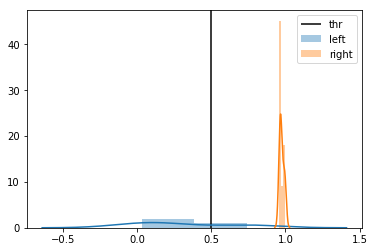

In [132]:
sns.distplot(y_pred_log_proba[y_test=='left'][:,1])
sns.distplot(y_pred_log_proba[y_test=='right'][:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['thr', 'left', 'right'])

Model + TfIDf

In [93]:
logistic_regression_2 = LogisticRegression()
logistic_regression_2.fit(train_tfidf, y_train)

LogisticRegression()

In [96]:
y_pred_log_2 = logistic_regression_2.predict(test_tfidf)

In [97]:
accuracy_score(y_pred_log_2, y_test)

0.7272727272727273

In [98]:
confusion_matrix(y_pred_log_2, y_test)

array([[0, 0],
       [3, 8]])

In [101]:
y_pred_log_2_proba = logistic_regression_2.predict_proba(test)

In [125]:
np.around(y_pred_log_2_proba[y_test=='left'] ,3)

array([[0.967, 0.033],
       [0.999, 0.001],
       [1.   , 0.   ]])

In [126]:
np.around(y_pred_log_2_proba[y_test=='right'] ,3)

array([[0.155, 0.845],
       [0.519, 0.481],
       [0.003, 0.997],
       [0.03 , 0.97 ],
       [0.357, 0.643],
       [0.194, 0.806],
       [0.619, 0.381],
       [0.282, 0.718]])

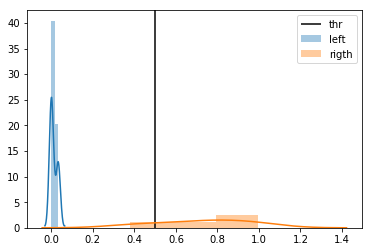

In [133]:
sns.distplot(y_pred_log_2_proba[y_test=='left'][:,1])
sns.distplot(y_pred_log_2_proba[y_test=='right'][:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['thr', 'left', 'rigth'])